In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [4]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

TOP 5

Sports & Outdoors                     
Beauty                                   
Handmade Clothing, Shoes & Accessories    
Bath & Body                              
Birthday Gifts    

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [9]:
frequency_table_top6= df['category'].value_counts().head(6)
frequency_table_top6

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Name: count, dtype: int64

C:\Users\polur\AppData\Local\Temp\ipykernel_32660\913918214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_top6.index, y=frequency_table_top6.values, palette="Set3");


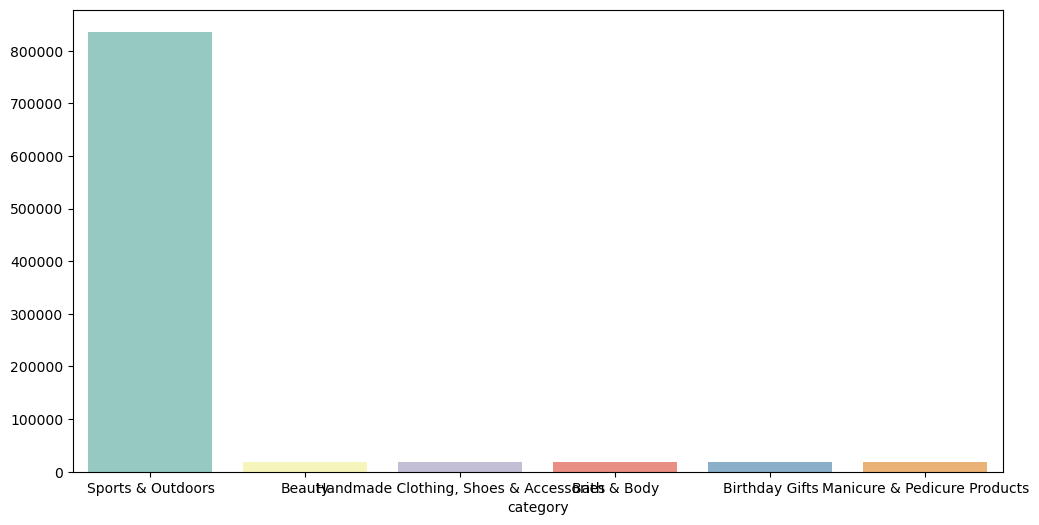

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_table_top6.index, y=frequency_table_top6.values, palette="Set3");
plt.show()

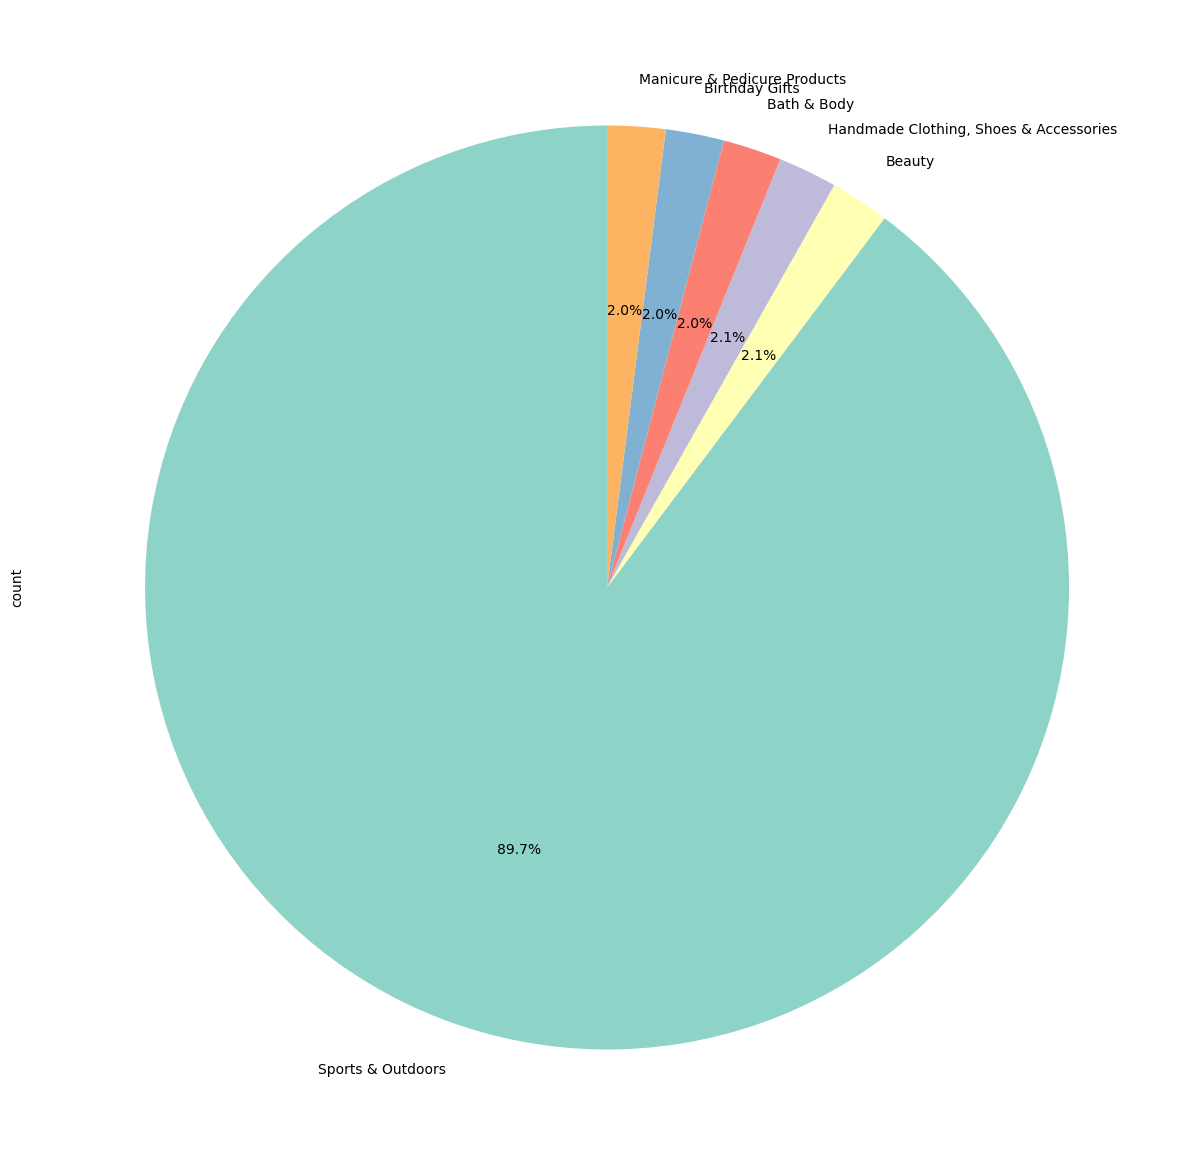

In [15]:
plt.figure(figsize=(18, 15))
df['category'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?


1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [16]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

La media de precios es de 89,24 mientras que la moda es de 9,99, esto nos indica que hay productos con precios muy altos en comparación a la mayoria y eso nos hace tener una perecpción diferente del precio medio por eso aplicamos la moda.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [17]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

La varianza de 119,445 y una desviación estándar de 345 son muy altas en comparación con los quartiles, lo que indica una gran dispersión de precios.

El precio máximo es 100,000, mientras que el 75% de los productos están por debajo de 45.99. Lo que indica la presencia de outliers.


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

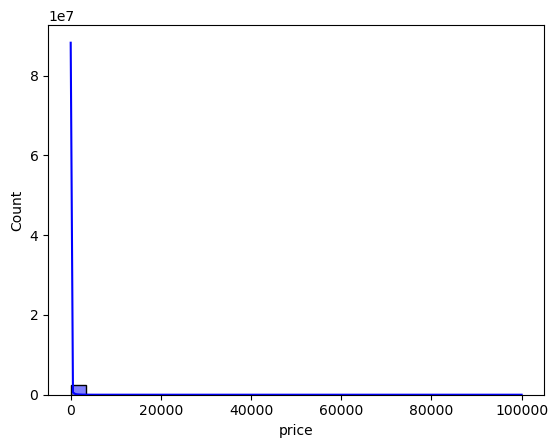

In [18]:
sns.histplot(df['price'], kde=True, bins=30, color="blue")
plt.show()

In [19]:
df_95 = df['price'].quantile(0.95)

df_to_95 = df[df['price'] <= df_95]

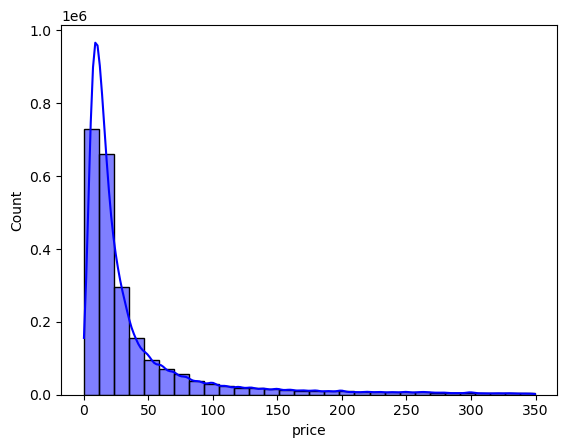

In [20]:
sns.histplot(df_to_95['price'], kde=True, bins=30, color="blue")
plt.show()

Ya que la mayoria de los productos esta por debajo de los 45,99 y hay productos de que tienen un precio de 100000 nos complica la vista del histograma.

Para solucionarlo hacemos un filtro del quartil 95, asi podemos ver el 95% de los valores y tener un histograma mas claro.

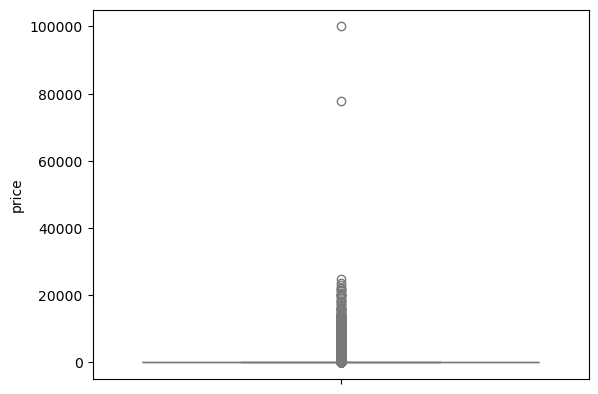

In [15]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

Aqui podemos ver como hay la presencia de 2 outliers muy lejos del resto de precios uno por los 80000 y otro de 100000.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [21]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

La media es de 2.15 y la moda y la mediana de 0, esto nos indica que la mayoria de los clientes no deja una valoración de los productos.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [26]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, min_rating, max_rating, range_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

No, no son consistentes, mas de la mitad de clientes no pone valoraciones.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [27]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

Las valoraciones no siguen una distribución normal, pero están bastante equilibradas sin mucha inclinación.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

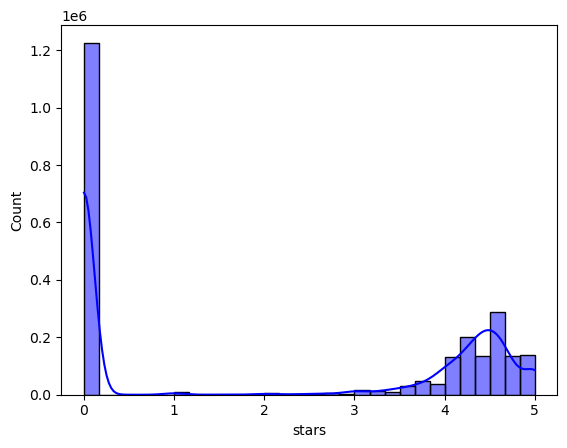

In [29]:
sns.histplot(df['stars'], kde=True, bins=30, color="blue")
plt.show()